In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv("insurance.csv")

In [190]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [191]:
df.shape

(1340, 10)

In [192]:
pd.set_option("display.float_format","{:.2f}".format)

In [193]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [194]:
sns.set(style="whitegrid", palette="Set2", font_scale= 1.1)

In [195]:
df.duplicated().sum()

0

In [196]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [197]:
df.dropna(inplace = True)

In [198]:
 df.shape

(1332, 10)

In [199]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


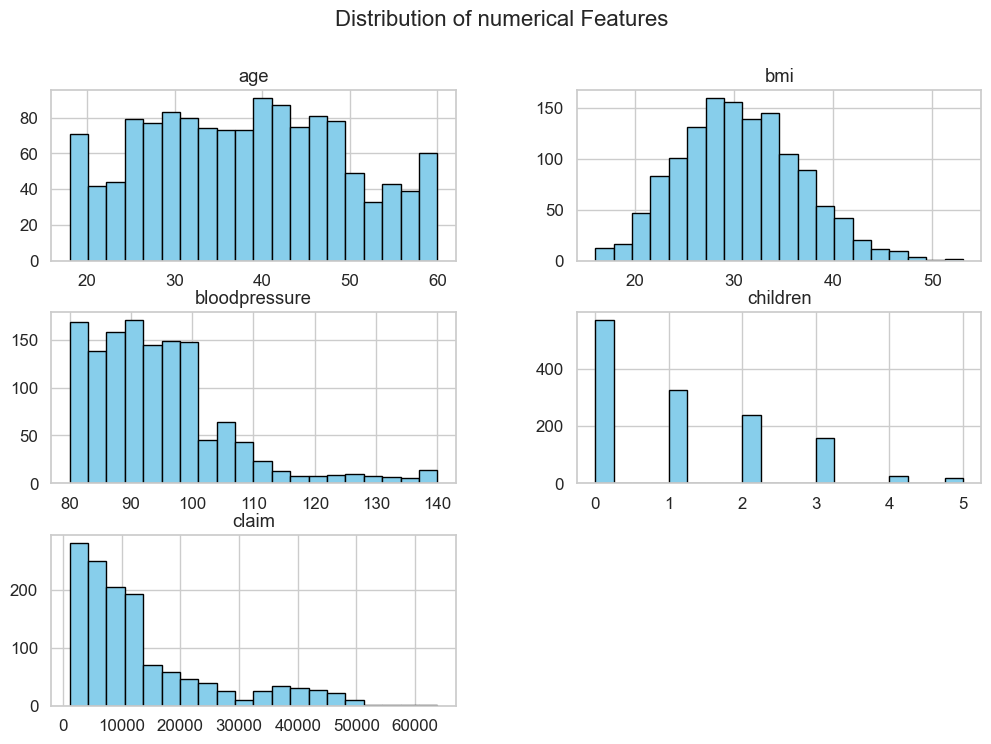

In [200]:
numeric_cols = ["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8), color = "skyblue",edgecolor = "black")
plt.suptitle("Distribution of numerical Features", fontsize=16)
plt.show()

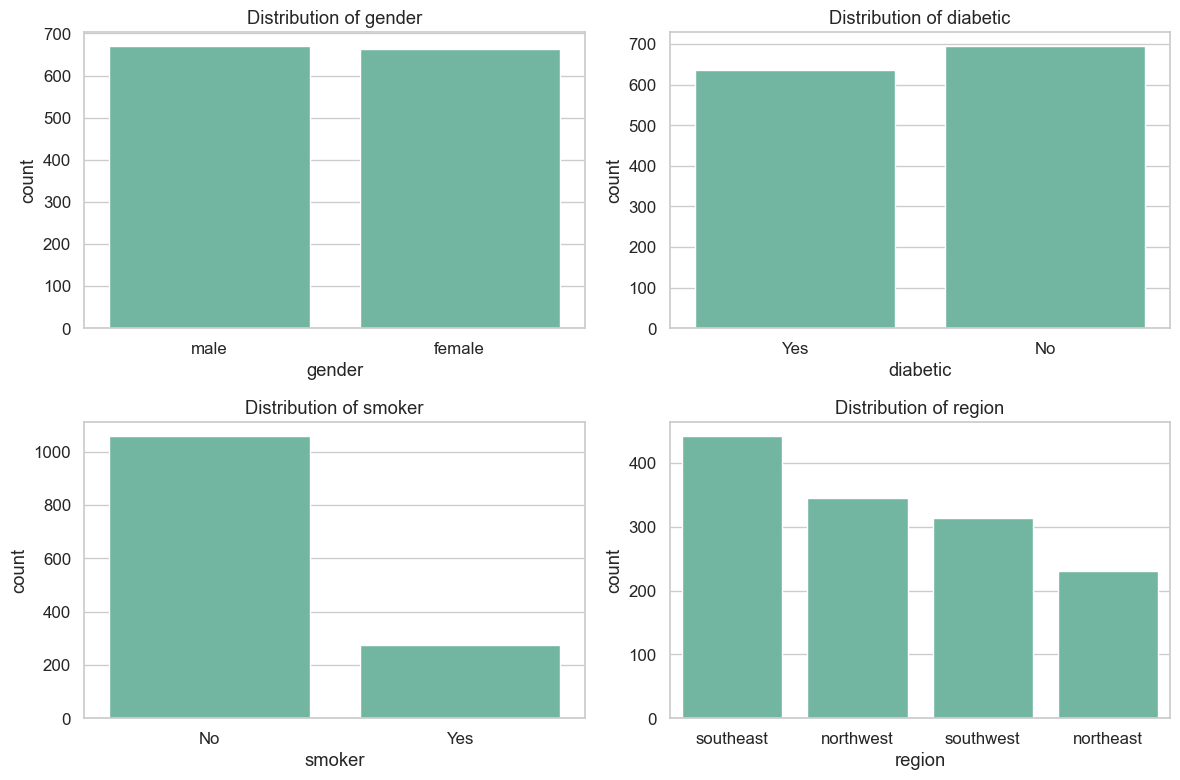

In [201]:
cat_cols = ["gender","diabetic","smoker","region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [202]:
df.groupby(["gender","smoker",])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

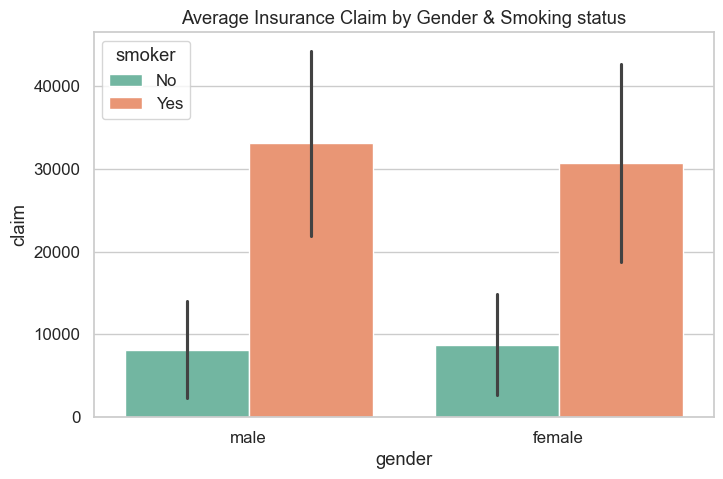

In [203]:
plt.figure(figsize=(8,5))
sns.barplot(data = df,x = "gender", y="claim",hue ="smoker", estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking status")
plt.show()

In [204]:
pivot_region_diabetic = df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [205]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


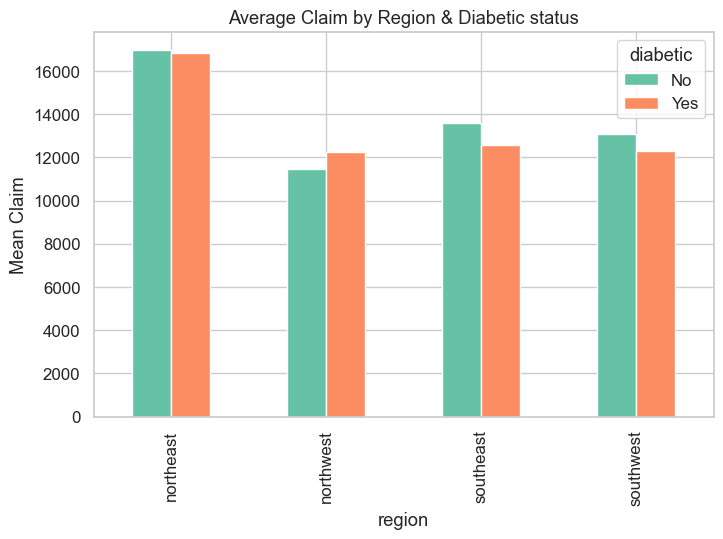

In [206]:
pivot_region_diabetic.plot(kind = "bar", figsize= (8,5))
plt.title("Average Claim by Region & Diabetic status")
plt.ylabel("Mean Claim")
plt.show()

In [207]:
pivot_table = pd.pivot_table(df, values="claim", index = "region",columns = "smoker", aggfunc ="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [208]:
pivot_table = pd.pivot_table(df, values="claim", index = "children",columns = "diabetic", aggfunc ="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


Text(0.5, 1.0, 'Correlation Heatmap')

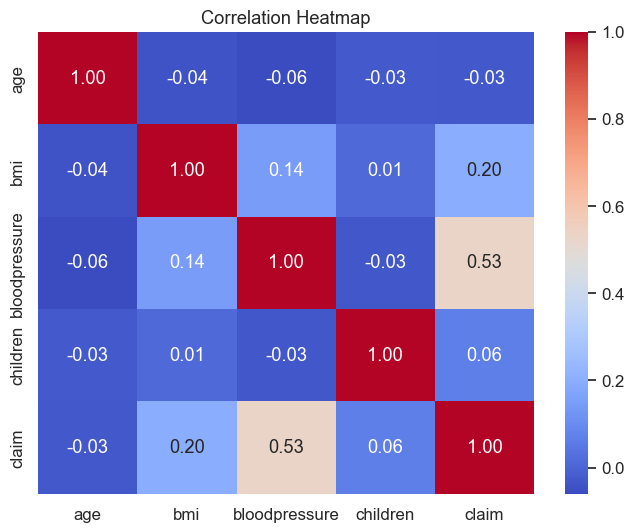

In [209]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot= True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Claim vs Age by Smoker & gender')

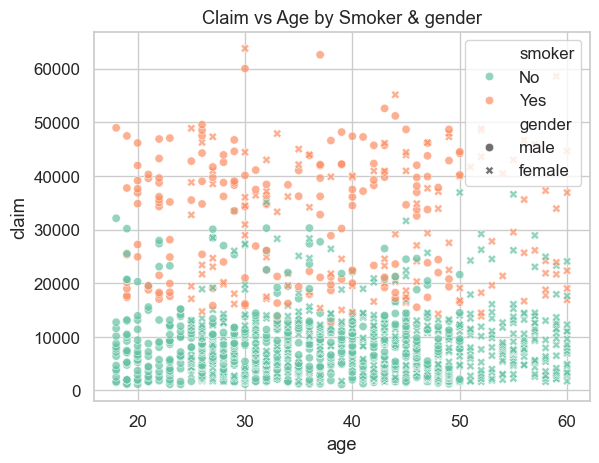

In [210]:
sns.scatterplot(data = df, x ="age", y ="claim", hue = "smoker", style="gender", alpha=0.7)
plt.title("Claim vs Age by Smoker & gender")

Text(0.5, 1.0, 'Relationship Between BMI and Claim Amount')

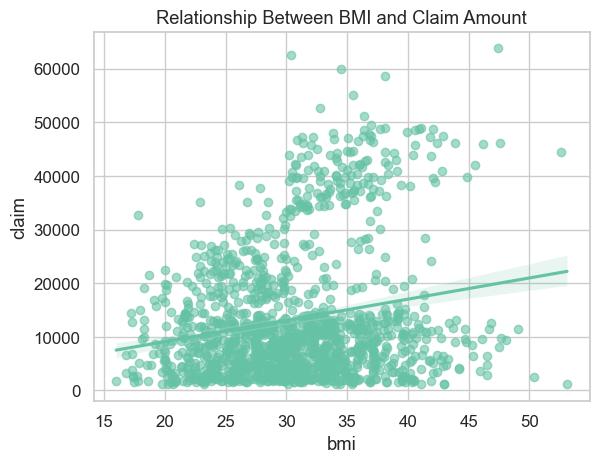

In [211]:
sns.regplot(data = df, x = "bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship Between BMI and Claim Amount")

Text(0.5, 1.0, 'Claim Distribution by Numner of Children')

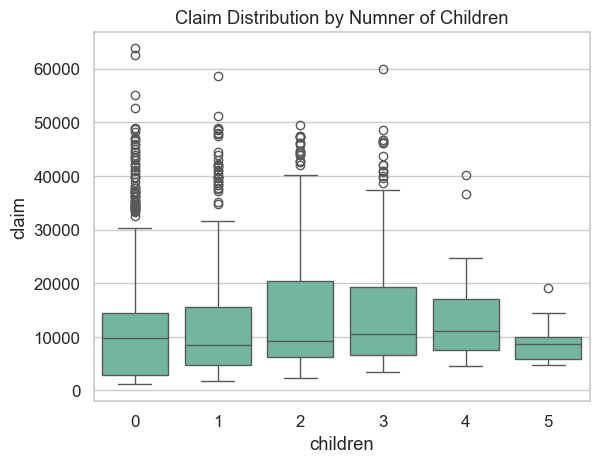

In [212]:
sns.boxplot(data = df, x="children", y="claim")
plt.title("Claim Distribution by Numner of Children")

In [213]:
df["age_group"] = pd.cut(df["age"], bins = [0,18,30,45,60,100], labels=["<18","18-30","31-45","46-60","60+"])

In [214]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [215]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Claim by Age Group')

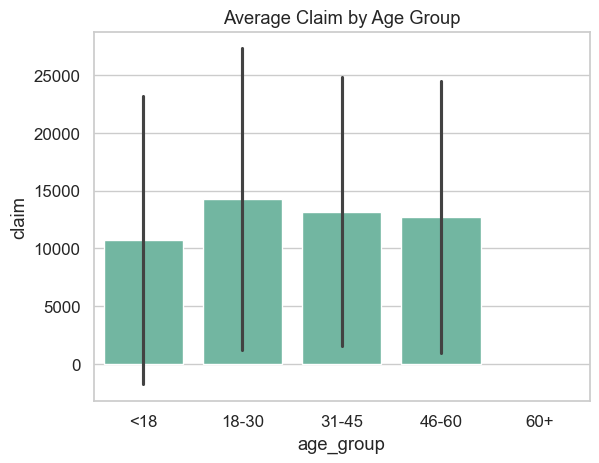

In [216]:
sns.barplot(data = df, x="age_group", y="claim", estimator= "mean", errorbar ="sd")
plt.title("Average Claim by Age Group")

In [217]:
df["bmi_category"] = pd.cut(df["bmi"],bins = [0,18.5, 24.9, 29.9, 100], labels=["Under weight","Normal","Overweight","Obese "])

In [218]:
df["bmi_category"].value_counts()

bmi_category
Obese           702
Overweight      387
Normal          222
Under weight     21
Name: count, dtype: int64

Text(0.5, 1.0, 'Claim Distribution by BMI Category')

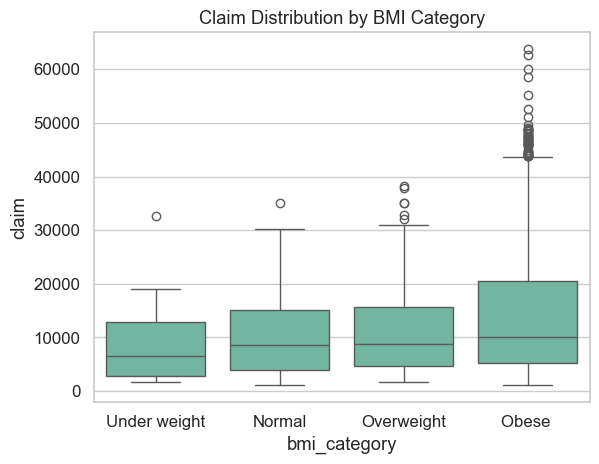

In [219]:
sns.boxplot(data = df, x="bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")

In [220]:
#feature engineering part

region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim","mean")
).reset_index()

In [221]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


Text(0.5, 1.0, 'Smoker Rate & Average Claim by Region')

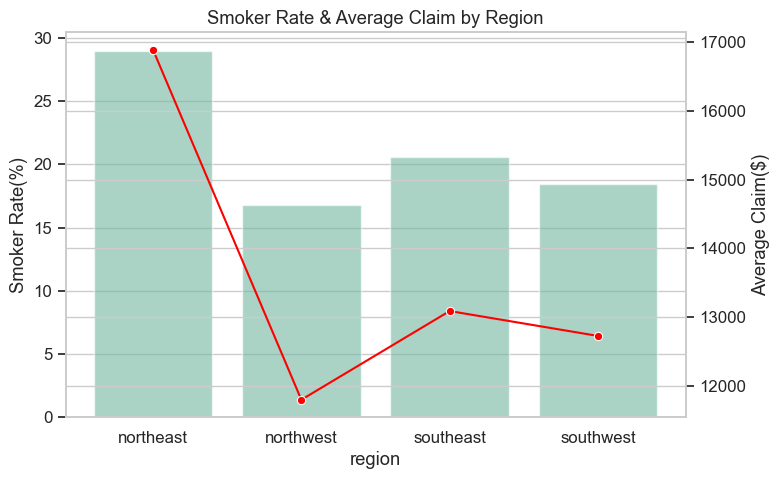

In [222]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_stats, x="region", y="smoker_rate", ax=ax1, alpha = 0.6)
ax2 = ax1.twinx()
sns.lineplot(data = region_stats, x="region", y="mean_claim", ax=ax2, color = "red", marker = "o")
ax1.set_ylabel("Smoker Rate(%)")
ax2.set_ylabel("Average Claim($)")
plt.title("Smoker Rate & Average Claim by Region")

DATA PREPROCESSING 

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


In [224]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_category
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45,Normal
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30,Obese
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30,Obese
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30,Obese
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45,Obese
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60,Obese
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30,Obese
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45,Obese


In [225]:
X = df[["age","gender","bmi","bloodpressure","diabetic","children","smoker"]]
y = df["claim"]


In [226]:
cat_cols = ["gender","diabetic","smoker"]
label_encoders = {}

In [227]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

C:\Users\workt\AppData\Local\Temp\ipykernel_17760\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\workt\AppData\Local\Temp\ipykernel_17760\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\workt\AppData\Local\Temp\ipykernel_17760\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [228]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [229]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [230]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [232]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [233]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [234]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


ML MODEL

In [235]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [236]:
# First, install the xgboost package
!pip install xgboost

# Then import the libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [237]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return{"R2" :r2, "MAE": mae, "RMSE" : rmse}

In [238]:
results = {}

In [239]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree= degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

score = poly_lr.score(X_test_poly, y_test)
if score > best_poly_score:
    best_poly_score = score
    best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model
results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)
print("Polynomial Regression models are trained")

rf = RandomForestRegressor()

rf_params ={
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs = -1, verbose= 0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest Training is completed, bestparameters:", rf_grid.best_params_)


svr = SVR()

svr_params = {
    "kernel" :["rbf","poly","linear"],
    "C":[1,10,50],
    "epsilon": [0.1, 0.2, 0.5],
    "degree" :[2,3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring="r2", n_jobs = -1, verbose= 0)

svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_

results["SVR"] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR Training is completed, bestparameters:", svr_grid.best_params_)

xgb = XGBRegressor(objective="reg:squarederror")

xgb_params ={
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
}


xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring="r2", n_jobs = -1, verbose= 0)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost Training is completed, bestparameters:", xgb_grid.best_params_)

Linear Regression model trained
Polynomial Regression models are trained
Random Forest Training is completed, bestparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR Training is completed, bestparameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost Training is completed, bestparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [240]:
results

{'Linear Regression': {'R2': 0.7186402865210724,
  'MAE': 5034.26319889741,
  'RMSE': 6368.137982018985},
 'Polynomial Regression (deg = 3)': {'R2': 0.7167440064308159,
  'MAE': 4836.765215616317,
  'RMSE': 6389.561615530279},
 'Random Forest': {'R2': 0.8210336443641147,
  'MAE': 3894.5884930630596,
  'RMSE': 5078.8712745005205},
 'SVR': {'R2': 0.49799294655626736,
  'MAE': 5916.907409876847,
  'RMSE': 8506.216223009234},
 'XGBoost': {'R2': 0.8323172161437656,
  'MAE': 3820.3895535975535,
  'RMSE': 4916.157026030382}}

In [241]:
results_df = pd.DataFrame(results).T.sort_values(by= "R2", ascending= False)
results_df

,R2,MAE,RMSE
XGBoost,0.83,3820.39,4916.16
Random Forest,0.82,3894.59,5078.87
Linear Regression,0.72,5034.26,6368.14
Polynomial Regression (deg = 3),0.72,4836.77,6389.56
SVR,0.50,5916.91,8506.22


In [242]:
models ={
    "Linear Regression": lr,
    f"Polynomial Regression (deg = {best_poly_model[0]}) ": best_poly_model[2], # Use the correct key and model for polynomial regression
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb,
}

In [243]:
best_r2 = results_df["R2"].max()

In [244]:
best_r2

0.8323172161437656

In [245]:
top_model = results_df[results_df["R2"] == best_r2]

In [246]:
top_model

,R2,MAE,RMSE
XGBoost,0.83,3820.39,4916.16


In [247]:
best_model = models[top_model.index[0]]

In [248]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [249]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model seclected: {top_model.index[0]}")

Best model seclected: XGBoost
